In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from matplotlib.lines import Line2D
import joblib
import glob
from collections import Counter

params = {
    "font.size": 18,
    "legend.fontsize": 18,
    "axes.linewidth": 1,
    "axes.edgecolor": "black",
    "xtick.major.width": 1,
    "xtick.minor.width": 1,
    "xtick.major.size": 5,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "ytick.major.size": 5,
    "axes.labelsize": 18,
    "text.usetex": True,
    "text.latex.preamble": r"\usepackage{amsmath}",
}
plt.rcParams.update(params)

# Figure 4

/tmp/ipykernel_93899/3833454159.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("gist_rainbow", gnbcodewords * uecodewords)


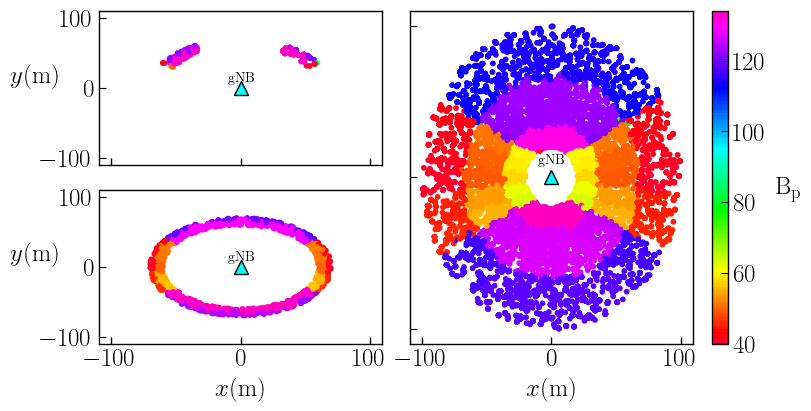

In [12]:
data = pd.read_parquet("reported_reported_reported_results/beam_pair_data_mimo=8x8.pqt")
data["angle"] = np.arctan2(data["y-ue"], data["x-ue"])
data["angle"] = data["angle"].apply(lambda x: x if x > 0 else x + 2 * np.pi)
data2 = data[(data["radius"] < 70) & (data["radius"] > 60)]
data3 = data[
    ((data["radius"] < 70) & (data["radius"] > 60))
    & ((data["angle"] < np.pi / 3) & (data["angle"] > np.pi / 6))
]
data4 = data[
    ((data["radius"] < 70) & (data["radius"] > 60))
    & ((data["angle"] >= 4 * np.pi / 6) & (data["angle"] <= 5 * np.pi / 6))
]

gnbcodewords = 70
uecodewords = 2
pairmatrix = np.arange(0, gnbcodewords * uecodewords)
pairmatrix = pairmatrix.reshape(uecodewords, gnbcodewords)
colors = cm.get_cmap("gist_rainbow", gnbcodewords * uecodewords)

fig, axd = plt.subplot_mosaic(
    [["upper left", "right"], ["lower left", "right"]],
    sharey=True,
    sharex=True,
    figsize=(8, 4),
    layout="constrained",
)
axd["upper left"].scatter(
    data3["x-ue"][::150],
    data3["y-ue"][::150],
    c=data3["Pair-beam"][::150],
    cmap=colors,
    marker="o",
    s=10,
    linestyle="None",
)
axd["upper left"].scatter(
    data4["x-ue"][::150],
    data4["y-ue"][::150],
    c=data4["Pair-beam"][::150],
    cmap=colors,
    marker="o",
    s=10,
    linestyle="None",
)
axd["upper left"].plot(
    [0],
    [0],
    marker="^",
    markersize=10,
    markerfacecolor="cyan",
    markeredgewidth=1,
    markeredgecolor="black",
)
axd["upper left"].text(-10, 9, r"$\mathrm{gNB}$", fontsize=10)
axd["upper left"].set_ylabel(r"$y(\mathrm{m})$", rotation=0)
axd["lower left"].scatter(
    data2["x-ue"][::150],
    data2["y-ue"][::150],
    c=data2["Pair-beam"][::150],
    cmap=colors,
    marker="o",
    s=10,
    linestyle="None",
)
axd["lower left"].set_ylabel(r"$y(\mathrm{m})$", rotation=0)
axd["lower left"].set_xlabel(r"$x(\mathrm{m})$")
axd["lower left"].plot(
    [0],
    [0],
    marker="^",
    markersize=10,
    markerfacecolor="cyan",
    markeredgewidth=1,
    markeredgecolor="black",
)
axd["lower left"].text(-10, 9, r"$\mathrm{gNB}$", fontsize=10)
im2 = axd["right"].scatter(
    data["x-ue"][::100],
    data["y-ue"][::100],
    c=data["Pair-beam"][::100],
    cmap=colors,
    marker="o",
    s=10,
    linestyle="None",
)
axd["right"].set_xlabel(r"$x(\mathrm{m})$")
axd["right"].plot(
    [0],
    [0],
    marker="^",
    markersize=10,
    markerfacecolor="cyan",
    markeredgewidth=1,
    markeredgecolor="black",
)
axd["right"].text(-10, 9, r"$\mathrm{gNB}$", fontsize=10)
cbar = fig.colorbar(im2)
cbar.set_label(r"$\mathrm{B_p}$", rotation=0, labelpad=15)

# Figure 5

Text(0, 0.5, '$\\mathrm{ET(ms)}$')

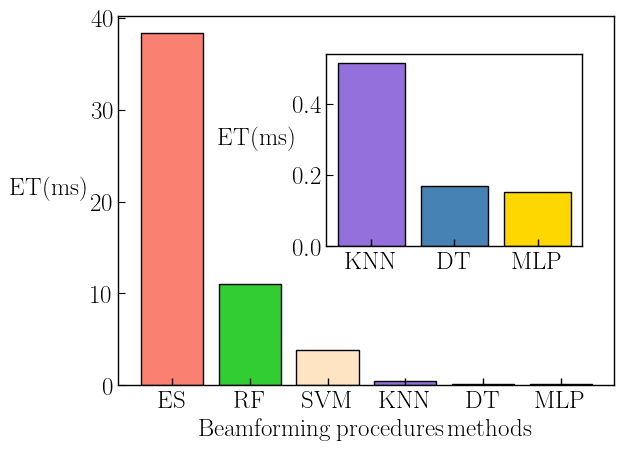

In [19]:
models = ["es", "rf", "svm", "knn", "dt", "mlp"]
times = []
for model in models:
    times.append(
        pd.read_csv("reported_results/" + model + "_execution_time.txt", header=None)[
            0
        ].mean()
    )

keys = [
    r"$\mathrm{ES}$",
    r"$\mathrm{RF}$",
    r"$\mathrm{SVM}$",
    r"$\mathrm{KNN}$",
    r"$\mathrm{DT}$",
    r"$\mathrm{MLP}$",
]
colors = ["salmon", "limegreen", "bisque", "mediumpurple", "steelblue", "gold"]
fig, ax = plt.subplots()

for key, time, color in zip(keys, times, colors):
    plt.bar(key, time * 1e3, color=color, edgecolor="black")
plt.ylabel(r"$\mathrm{ET(ms)}$", rotation=0, labelpad=30)
plt.xlabel(r"$\mathrm{Beamforming\,procedures\,methods}$")
ax_new = fig.add_axes([0.45, 0.4, 0.4, 0.4])
for key, time, color in zip(keys[3:], times[3:], colors[3:]):
    plt.bar(key, time * 1e3, color=color, edgecolor="black")
plt.ylabel(r"$\mathrm{ET(ms)}$", rotation=0, labelpad=25)

# Figure 6

/home/ludwing/Documentos/Inatel/XAD/repositories/xad_simu_beamforming/tsdenv/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ludwing/Documentos/Inatel/XAD/repositories/xad_simu_beamforming/tsdenv/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.2.1 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/ludwing/Documentos/Inatel/XAD/repositories/xad_simu_beamforming/tsdenv/lib/pyth

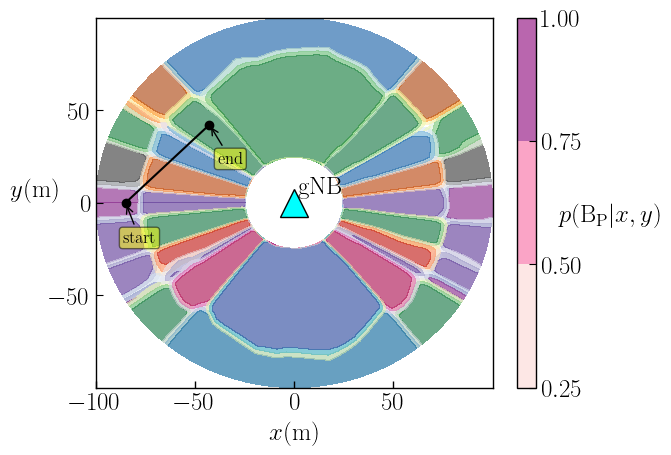

In [27]:
model = joblib.load("reported_results/8x8mlp_model_final.pkl")
scaler = joblib.load("reported_results/8x8mlp_scaler_final.pkl")
cmapscale = [
    "Greys",
    "Purples",
    "Blues",
    "Greens",
    "Oranges",
    "Reds",
    "YlOrBr",
    "YlOrRd",
    "OrRd",
    "PuRd",
    "RdPu",
    "BuPu",
    "GnBu",
    "PuBu",
    "YlGnBu",
    "PuBuGn",
    "BuGn",
    "YlGn",
]

cicle_radius = 24
x1 = np.linspace(-cicle_radius, cicle_radius, 1000)
y1 = np.linspace(-cicle_radius, cicle_radius, 1000)
X, Y = np.meshgrid(x1, y1)
F = X**2 + Y**2 - cicle_radius**2


fig, ax = plt.subplots()

colormap = np.random.choice(cmapscale, 60)
levels = [0.25, 0.5, 0.75, 1]
x0 = 0
y0 = 0
r = 100
phis = np.linspace(-np.pi, np.pi, 100)
radius = np.linspace(r, 0, 100)
radius_matrix, phi_matrix = np.meshgrid(radius, phis)
x = radius_matrix * np.cos(phi_matrix) + x0
y = radius_matrix * np.sin(phi_matrix) + y0

M = scaler.transform(np.column_stack([x.ravel(), y.ravel()]))
Z = model.predict_proba(M)

for j in range(Z.shape[1]):
    p = Z[:, j]
    p = p.reshape(x.shape)
    im = plt.contourf(x, y, p, levels, cmap=colormap[j], alpha=0.6)


machinepos = pd.read_csv(
    "./reported_reported_reported_reported_reported_reported_reported_reported_reported_results/machine_seven_gnbtxpower_20/mimo_8x8_uetxpower_15/MachineMobilityUeSample10.txt",
    delimiter="\t",
)

xposm = machinepos["x"]
yposm = machinepos["y"]

plt.plot(xposm, yposm, marker="o", linestyle="-", color="black")
plt.annotate(
    r"$\mathrm{start}$",
    xy=(-85, 0),
    xytext=(10, -20),
    size=12,
    textcoords="offset points",
    ha="center",
    va="top",
    bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.5),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
)

plt.annotate(
    r"$\mathrm{end}$",
    xy=(-42.7141, 42.2859),
    xytext=(15, -30),
    size=12,
    textcoords="offset points",
    ha="center",
    va="bottom",
    bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.5),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
)

plt.plot(
    [0],
    [0],
    marker="^",
    markersize=20,
    markerfacecolor="cyan",
    markeredgewidth=1,
    markeredgecolor="black",
)
plt.text(2, 5, r"$\mathrm{gNB}$", fontsize=18)

plt.contourf(X, Y, F, levels=[-1e16, 0], colors=["white"])

plt.xlabel(r"$x(\mathrm{m})$")
plt.ylabel(r"$y(\mathrm{m})$", rotation=0, labelpad=10)
cbar = plt.colorbar(im)
cbar.set_label(r"$p(\mathrm{B_P}|x, y)$", rotation=0, labelpad=20)

# Figure 7 
"seven" correspond to the number of experiment in case variable

In [46]:
legend_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        markerfacecolor="blue",
        label=r"$\mathrm{UE\,TXPower=8dB}$",
        color="k",
        markersize=13,
        linestyle="None",
    ),
    Line2D(
        [0],
        [0],
        marker="^",
        markerfacecolor="red",
        label=r"$\mathrm{UE\,TXPower=10dB}$",
        color="k",
        markersize=13,
        linestyle="None",
    ),
    Line2D(
        [0],
        [0],
        marker="*",
        markerfacecolor="green",
        label=r"$\mathrm{UE\,TXPower=15dB}$",
        color="k",
        markersize=13,
        linestyle="None",
    ),
    Line2D(
        [0],
        [0],
        marker="p",
        markerfacecolor="gray",
        label=r"$\mathrm{Exhaustive\,search}$",
        color="k",
        markersize=13,
        linestyle="None",
    ),
]

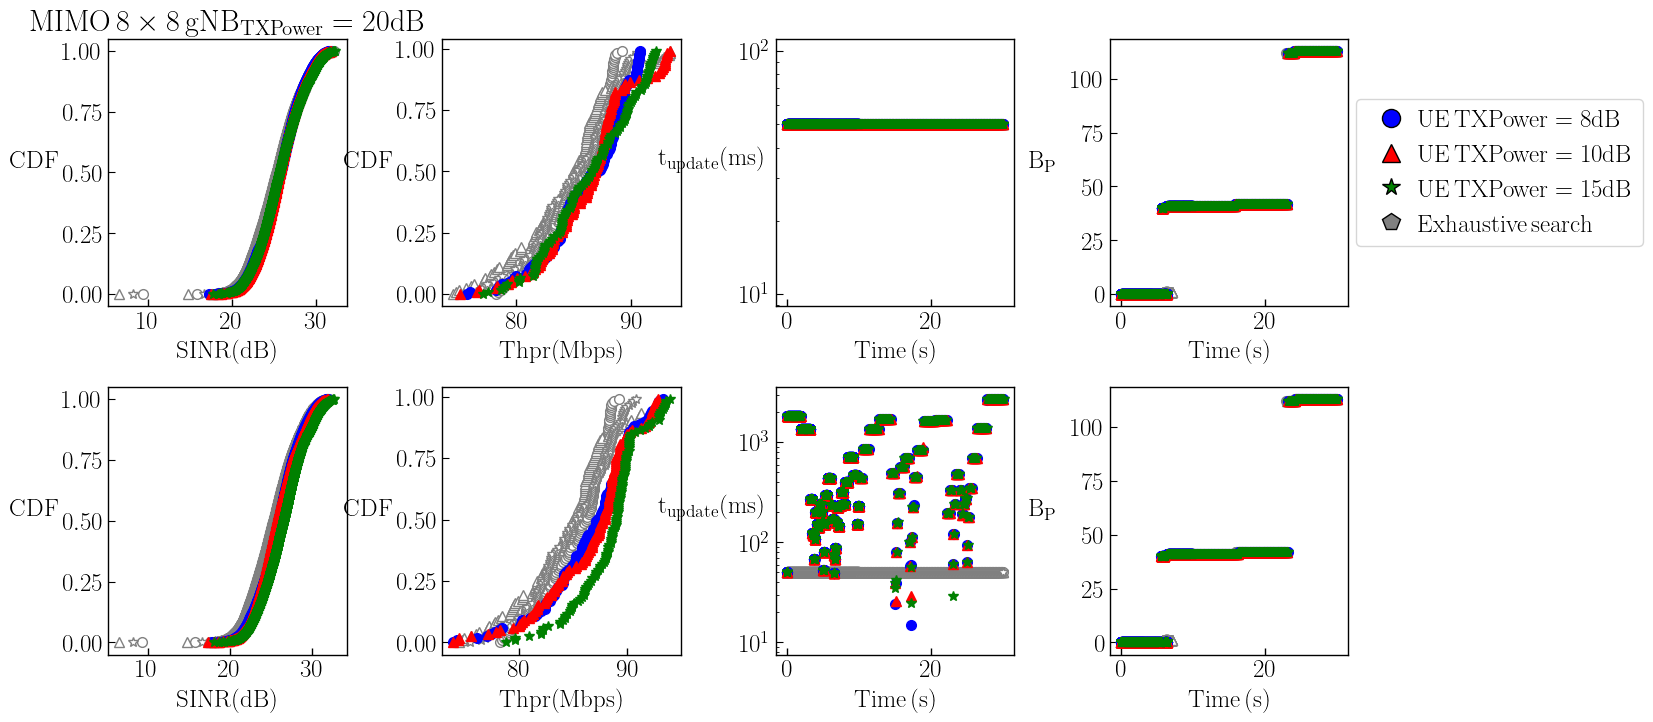

In [47]:

gnbpower = ["40", "30", "20"]

mimos = ["2x2", "4x4", "8x8"]
uepower = ["8", "10", "15"]

markers = ["o", "^", "*"]
colors = ["blue", "red", "green"]

fig, axs = plt.subplots(
    nrows=2,
    ncols=4,
    sharey=False,
    sharex=False,
    gridspec_kw={"hspace": 0.3, "wspace": 0.4},
    figsize=(16, 8),
)

case = "seven"
for power, marker in zip(uepower, markers):
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    classic = pd.read_parquet(file)
    axs[0,0].plot(
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"],
        np.arange(0, len(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"]))
        / len(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"]),
        marker=marker,
        markerfacecolor="white",
        markeredgecolor="gray",
        linestyle="None",
        markersize=7,
        markevery=100,
    )
case = "eight"
for power, marker, color in zip(uepower, markers, colors):
    file = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    machine = pd.read_parquet(file)
    axs[0,0].plot(
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"],
        np.arange(0, len(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"]))
        / len(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"]),
        marker=marker,
        markerfacecolor=color,
        markeredgecolor=color,
        linestyle="None",
        markersize=7,
        markevery=100,
    )

axs[0,0].set_xlabel(r"$\mathrm{SINR(dB)}$")
axs[0,0].set_ylabel(r"$\mathrm{CDF}$", rotation=0, labelpad=20)
axs[0,0].set_title(r"$\mathrm{MIMO\,8\times 8\,gNB_{TXPower}=%sdB}$" % (gnbpower[2]))

case="seven"
for power, marker in zip(uepower, markers):
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    classic = pd.read_parquet(file)
    axs[0,1].plot(
        np.sort(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]),
        np.arange(0, len(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]))
        / len(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]),
        marker=marker,
        markerfacecolor="white",
        markeredgecolor="gray",
        linestyle="None",
        markersize=7,
    )

case="eight"
for power, marker, color in zip(uepower, markers, colors):
    file = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    machine = pd.read_parquet(file)
    axs[0,1].plot(
        np.sort(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]),
        np.arange(0, len(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]))
        / len(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]),
        marker=marker,
        markerfacecolor=color,
        markeredgecolor=color,
        linestyle="None",
        markersize=7,
    )

axs[0,1].set_xlabel(r"$\mathrm{Thpr(Mbps)}$")
axs[0,1].set_ylabel(r"$\mathrm{CDF}$", rotation=0, labelpad=20)

case="seven"
for power, marker in zip(uepower, markers):
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_time.pqt"
    )
    classic = pd.read_parquet(file)
    axs[0,2].plot(
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_time"],
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_updatetime"],
        marker=marker,
        markerfacecolor="white",
        markeredgecolor="gray",
        linestyle="None",
        markersize=7,
        markevery=100,
    )

case="eight"
for power, marker, color in zip(uepower, markers, colors):
    file = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_time.pqt"
    )
    machine = pd.read_parquet(file)
    axs[0,2].plot(
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_time"],
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_updatetime"],
        marker=marker,
        markerfacecolor=color,
        markeredgecolor=color,
        linestyle="None",
        markersize=7,
        markevery=100,
    )

axs[0,2].set_xlabel(r"$\mathrm{Time\,(s)}$")
axs[0,2].set_ylabel(r"$\mathrm{t_{\mathrm{update}}(ms)}$", rotation=0, labelpad=20)
axs[0,2].set_yscale("log")

case="seven"
for power, marker in zip(uepower, markers):
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_beam.pqt"
    )
    classic = pd.read_parquet(file)
    axs[0,3].plot(
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_time"],
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_beam"],
        marker=marker,
        markerfacecolor="white",
        markeredgecolor="gray",
        linestyle="None",
        markersize=7,
        markevery=100,
    )
case="eight"
for power, marker, color in zip(uepower, markers, colors):
    file = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_beam.pqt"
    )
    machine = pd.read_parquet(file)
    axs[0,3].plot(
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_time"],
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_beam"],
        marker=marker,
        markerfacecolor=color,
        markeredgecolor=color,
        linestyle="None",
        markersize=7,
        markevery=100,
    )

axs[0,3].set_xlabel(r"$\mathrm{Time\,(s)}$")
axs[0,3].set_ylabel(r"$\mathrm{B_P}$", rotation=0, labelpad=20)


case = "seven"
for power, marker in zip(uepower, markers):
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    classic = pd.read_parquet(file)
    axs[1,0].plot(
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"],
        np.arange(0, len(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"]))
        / len(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"]),
        marker=marker,
        markerfacecolor="white",
        markeredgecolor="gray",
        linestyle="None",
        markersize=7,
        markevery=100,
    )

for power, marker, color in zip(uepower, markers, colors):
    file = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    machine = pd.read_parquet(file)
    axs[1,0].plot(
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"],
        np.arange(0, len(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"]))
        / len(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_sinr"]),
        marker=marker,
        markerfacecolor=color,
        markeredgecolor=color,
        linestyle="None",
        markersize=7,
        markevery=100,
    )

axs[1,0].set_xlabel(r"$\mathrm{SINR(dB)}$")
axs[1,0].set_ylabel(r"$\mathrm{CDF}$", rotation=0, labelpad=20)

for power, marker in zip(uepower, markers):
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    classic = pd.read_parquet(file)
    axs[1,1].plot(
        np.sort(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]),
        np.arange(0, len(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]))
        / len(classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]),
        marker=marker,
        markerfacecolor="white",
        markeredgecolor="gray",
        linestyle="None",
        markersize=7,
    )

for power, marker, color in zip(uepower, markers, colors):
    file = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    machine = pd.read_parquet(file)
    axs[1,1].plot(
        np.sort(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]),
        np.arange(0, len(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]))
        / len(machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_thrp"]),
        marker=marker,
        markerfacecolor=color,
        markeredgecolor=color,
        linestyle="None",
        markersize=7,
    )

axs[1,1].set_xlabel(r"$\mathrm{Thpr(Mbps)}$")
axs[1,1].set_ylabel(r"$\mathrm{CDF}$", rotation=0, labelpad=20)

for power, marker in zip(uepower, markers):
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_time.pqt"
    )
    classic = pd.read_parquet(file)
    axs[1,2].plot(
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_time"],
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_updatetime"],
        marker=marker,
        markerfacecolor="white",
        markeredgecolor="gray",
        linestyle="None",
        markersize=7,
        markevery=100,
    )

for power, marker, color in zip(uepower, markers, colors):
    file = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_time.pqt"
    )
    machine = pd.read_parquet(file)
    axs[1,2].plot(
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_time"],
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_updatetime"],
        marker=marker,
        markerfacecolor=color,
        markeredgecolor=color,
        linestyle="None",
        markersize=7,
        markevery=100,
    )

axs[1,2].set_xlabel(r"$\mathrm{Time\,(s)}$")
axs[1,2].set_ylabel(r"$\mathrm{t_{\mathrm{update}}(ms)}$", rotation=0, labelpad=20)
axs[1,2].set_yscale("log")

for power, marker in zip(uepower, markers):
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_beam.pqt"
    )
    classic = pd.read_parquet(file)
    axs[1,3].plot(
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_time"],
        classic["mimo_" + mimos[2] + "_uetxpower_" + power + "_beam"],
        marker=marker,
        markerfacecolor="white",
        markeredgecolor="gray",
        linestyle="None",
        markersize=7,
        markevery=100,
    )

for power, marker, color in zip(uepower, markers, colors):
    file = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_beam.pqt"
    )
    machine = pd.read_parquet(file)
    axs[1,3].plot(
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_time"],
        machine["mimo_" + mimos[2] + "_uetxpower_" + power + "_beam"],
        marker=marker,
        markerfacecolor=color,
        markeredgecolor=color,
        linestyle="None",
        markersize=7,
        markevery=100,
    )

axs[1,3].set_xlabel(r"$\mathrm{Time\,(s)}$")
axs[1,3].set_ylabel(r"$\mathrm{B_P}$", rotation=0, labelpad=20)


axs[0,-1].legend(
    handles=legend_elements,
    loc="center right",
    borderaxespad=-11.8,
    handletextpad=0.1,
    ncol=1,
    frameon=True,
)

# Figure 8 and Cumulative gain in SINR and THRP

In [4]:
legend_elements_2 = [
    Line2D(
        [0],
        [0],
        marker="s",
        markerfacecolor="yellow",
        label=r"$\mathrm{ML\text{-}Aided\text{-}Update\text{-}Time}$",
        color="k",
        markersize=13,
        linestyle="None",
    ),
    Line2D(
        [0],
        [0],
        marker="s",
        markerfacecolor="blue",
        label=r"$\mathrm{ML\text{-}Aided}$",
        color="k",
        markersize=13,
        linestyle="None",
    ),
    Line2D(
        [0],
        [0],
        marker="s",
        markerfacecolor="red",
        label=r"$\mathrm{Exhaustive\,Search}$",
        color="k",
        markersize=13,
        linestyle="None",
    ),
]

/tmp/ipykernel_13608/1175587534.py:137: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels((r"$8$", r"$10$", r"$15$"))


Cumulative gain in sinr for mimo= 8x8  gnbpower= 20  uepower= 8  is  76.42 % using Update Time Algorithm
Cumulative gain in sinr for mimo= 8x8  gnbpower= 20  uepower= 10  is  251.49 % using Update Time Algorithm
Cumulative gain in sinr for mimo= 8x8  gnbpower= 20  uepower= 15  is  452.84 % using Update Time Algorithm
Cumulative gain in thrp for mimo= 8x8  gnbpower= 20  uepower= 8  is  158.61 % using Update Time Algorithm
Cumulative gain in thrp for mimo= 8x8  gnbpower= 20  uepower= 10  is  246.86 % using Update Time Algorithm
Cumulative gain in thrp for mimo= 8x8  gnbpower= 20  uepower= 15  is  407.07 % using Update Time Algorithm
Cumulative gain in sinr for mimo= 8x8  gnbpower= 20  uepower= 8  is  42.42 % not using Update Time Algorithm
Cumulative gain in sinr for mimo= 8x8  gnbpower= 20  uepower= 10  is  112.38 % not using Update Time Algorithm
Cumulative gain in sinr for mimo= 8x8  gnbpower= 20  uepower= 15  is  72.98 % not using Update Time Algorithm
Cumulative gain in thrp for mim

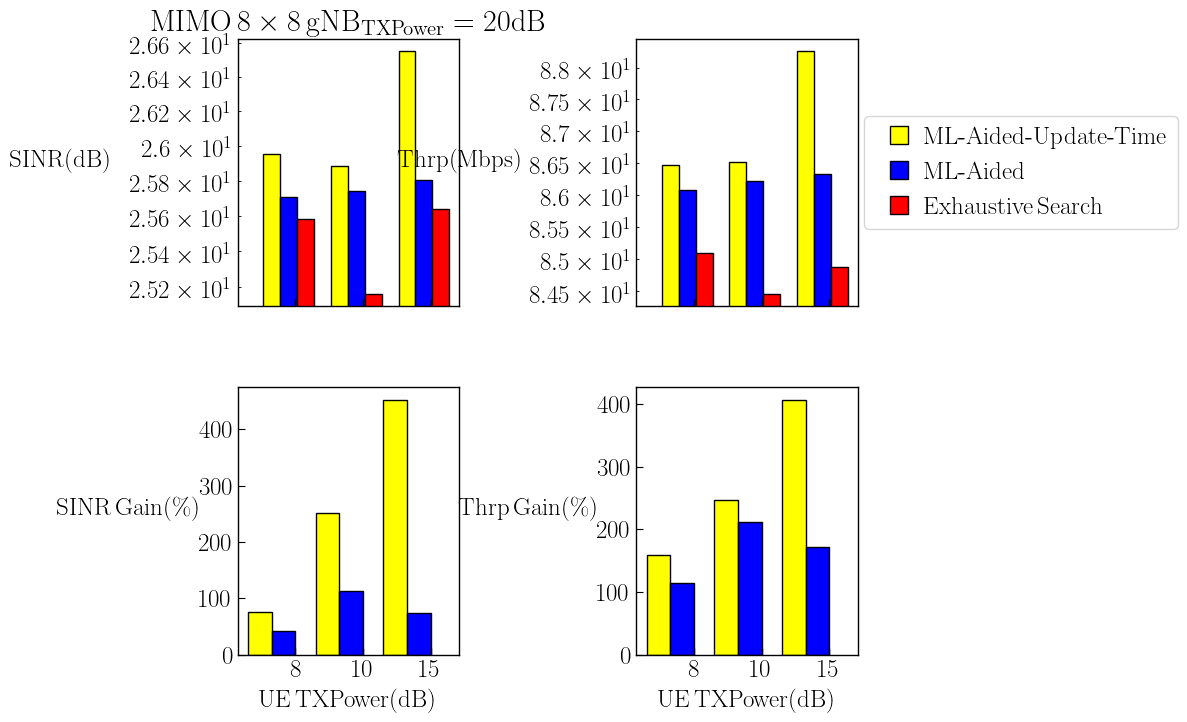

In [10]:
gnbpower = ["50", "30", "20"]

mimos = ["2x2", "4x4", "8x8"]
uepower = ["8", "10", "15"]

ind = np.arange(len(uepower))
width = 0.25

fig, axs = plt.subplots(
    nrows=2,
    ncols=2,
    sharey=False,
    sharex=True,
    gridspec_kw={"hspace": 0.3, "wspace": 0.8},
    figsize=(8, 8),
)


csinrs = []
msinrs = []
msinrs_2 = []
for power in uepower:
    case = "seven"
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    classic = pd.read_parquet(file)
    csinrs.append(
        classic[classic.columns[classic.columns.str.contains("sinr")][0]].mean()
    )
    file1 = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    machine = pd.read_parquet(file1)
    msinrs.append(
        machine[machine.columns[machine.columns.str.contains("sinr")][0]].mean()
    )
    case="eight"
    file2 = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    machine = pd.read_parquet(file2)
    msinrs_2.append(
        machine[machine.columns[machine.columns.str.contains("sinr")][0]].mean()
    )


axs[0,0].bar(ind, msinrs, width, color="yellow", edgecolor="black")
axs[0,0].bar(ind + width, msinrs_2, width, color="blue", edgecolor="black")
axs[0,0].bar(ind + 2*width, csinrs, width, color="red", edgecolor="black")
axs[0,0].set_ylabel(r"$\mathrm{SINR(dB)}$", rotation=0, labelpad=50)
axs[0,0].set_title(r"$\mathrm{MIMO\,8\times 8\,gNB_{TXPower}=%sdB}$" % (gnbpower[2]))
axs[0,0].set_yscale("log")


mthrps = []
mthrps_2 = []
cthrps = []
for power in uepower:
    case="seven"
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    classic = pd.read_parquet(file)
    cthrps.append(
        classic[classic.columns[classic.columns.str.contains("thrp")][0]].mean()
    )
    file1 = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    machine = pd.read_parquet(file1)
    mthrps.append(
        machine[machine.columns[machine.columns.str.contains("thrp")][0]].mean()
    )
    case="eight"
    file2 = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    machine = pd.read_parquet(file2)
    mthrps_2.append(
        machine[machine.columns[machine.columns.str.contains("thrp")][0]].mean()
    )

axs[0,1].bar(ind, mthrps, width, color="yellow", edgecolor="black")
axs[0,1].bar(ind + width, mthrps_2, width, color="blue", edgecolor="black")
axs[0,1].bar(ind + 2*width, cthrps, width, color="red", edgecolor="black")
axs[0,1].set_ylabel(r"$\mathrm{Thrp(Mbps)}$", rotation=0, labelpad=50)
axs[0,1].set_yscale("log")
axs[0,1].set_xticklabels((r"$8$", r"$10$", r"$15$"))


case = "seven"
sinr_gain=[]
for power in uepower:
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    classic = pd.read_parquet(file)
    file1 = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    machine = pd.read_parquet(file1)
    machine_time = machine[
        machine.columns[machine.columns.str.contains("time")][0]
    ].values.tolist()
    classic_time = classic[
        classic.columns[classic.columns.str.contains("time")][0]
    ].values.tolist()
    target_time = list(set(machine_time) & set(classic_time))
    machine_data = machine.loc[
        (machine[machine.columns[machine.columns.str.contains("time")][0]]).isin(
            target_time
        )
    ][machine.columns[machine.columns.str.contains("sinr")][0]].to_numpy()
    classic_data = classic.loc[
        (classic[classic.columns[classic.columns.str.contains("time")][0]]).isin(
            target_time
        )
    ][classic.columns[classic.columns.str.contains("sinr")][0]].to_numpy()
    gain=np.sum(((machine_data - classic_data) / classic_data))* 100/ len(target_time)* 100
    sinr_gain.append(gain)
    print(
        "Cumulative gain in sinr for mimo=",
        mimos[2],
        " gnbpower=",
        gnbpower[2],
        " uepower=",
        power,
        " is ",
        round(gain, 2),
        "% using Update Time Algorithm",
    )
thrp_gain=[]
for power in uepower:
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    classic = pd.read_parquet(file)
    file1 = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    machine = pd.read_parquet(file1)
    machine_time = machine[
        machine.columns[machine.columns.str.contains("time")][0]
    ].values.tolist()
    classic_time = classic[
        classic.columns[classic.columns.str.contains("time")][0]
    ].values.tolist()
    target_time = list(set(machine_time) & set(classic_time))
    machine_data = machine.loc[
        (machine[machine.columns[machine.columns.str.contains("time")][0]]).isin(
            target_time
        )
    ][machine.columns[machine.columns.str.contains("thrp")][0]].to_numpy()
    classic_data = classic.loc[
        (classic[classic.columns[classic.columns.str.contains("time")][0]]).isin(
            target_time
        )
    ][classic.columns[classic.columns.str.contains("thrp")][0]].to_numpy()
    gain=np.sum(((machine_data - classic_data) / classic_data))* 100/ len(target_time)* 100
    thrp_gain.append(gain)
    print(
        "Cumulative gain in thrp for mimo=",
        mimos[2],
        " gnbpower=",
        gnbpower[2],
        " uepower=",
        power,
        " is ",
        round(gain, 2),
        "% using Update Time Algorithm",
    )


sinr_gain_2=[]
for power in uepower:
    case = "seven"
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    classic = pd.read_parquet(file)
    case = "eight"
    file1 = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_sinr.pqt"
    )
    machine = pd.read_parquet(file1)
    machine_time = machine[
        machine.columns[machine.columns.str.contains("time")][0]
    ].values.tolist()
    classic_time = classic[
        classic.columns[classic.columns.str.contains("time")][0]
    ].values.tolist()
    target_time = list(set(machine_time) & set(classic_time))
    machine_data = machine.loc[
        (machine[machine.columns[machine.columns.str.contains("time")][0]]).isin(
            target_time
        )
    ][machine.columns[machine.columns.str.contains("sinr")][0]].to_numpy()
    classic_data = classic.loc[
        (classic[classic.columns[classic.columns.str.contains("time")][0]]).isin(
            target_time
        )
    ][classic.columns[classic.columns.str.contains("sinr")][0]].to_numpy()
    gain=np.sum(((machine_data - classic_data) / classic_data))* 100/ len(target_time)* 100
    sinr_gain_2.append(gain)
    print(
        "Cumulative gain in sinr for mimo=",
        mimos[2],
        " gnbpower=",
        gnbpower[2],
        " uepower=",
        power,
        " is ",
        round(gain, 2),
        "% not using Update Time Algorithm",
    )
thrp_gain_2=[]
for power in uepower:
    case="seven"
    file = (
        "./reported_results/classic_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    classic = pd.read_parquet(file)
    case="eight"
    file1 = (
        "./reported_results/machine_"
        + case
        + "_gnbtxpower_"
        + gnbpower[2]
        + "/mimo_"
        + mimos[2]
        + "_uetxpower_"
        + power
        + "/final_result_thrp.pqt"
    )
    machine = pd.read_parquet(file1)
    machine_time = machine[
        machine.columns[machine.columns.str.contains("time")][0]
    ].values.tolist()
    classic_time = classic[
        classic.columns[classic.columns.str.contains("time")][0]
    ].values.tolist()
    target_time = list(set(machine_time) & set(classic_time))
    machine_data = machine.loc[
        (machine[machine.columns[machine.columns.str.contains("time")][0]]).isin(
            target_time
        )
    ][machine.columns[machine.columns.str.contains("thrp")][0]].to_numpy()
    classic_data = classic.loc[
        (classic[classic.columns[classic.columns.str.contains("time")][0]]).isin(
            target_time
        )
    ][classic.columns[classic.columns.str.contains("thrp")][0]].to_numpy()
    gain=np.sum(((machine_data - classic_data) / classic_data))* 100/ len(target_time)* 100
    thrp_gain_2.append(gain)
    print(
        "Cumulative gain in thrp for mimo=",
        mimos[2],
        " gnbpower=",
        gnbpower[2],
        " uepower=",
        power,
        " is ",
        round(gain, 2),
        "% not using Update Time Algorithm",
    )

width=0.35
axs[1,0].bar(ind-width/2, sinr_gain, width, color="yellow", edgecolor="black")
axs[1,0].bar(ind + width/2, sinr_gain_2, width, color="blue", edgecolor="black")
axs[1,0].set_ylabel(r"$\mathrm{SINR\,Gain(\%)}$", rotation=0, labelpad=50)
axs[1,0].set_xticks(ind +  width)
axs[1,0].set_xlabel(r"$\mathrm{UE\,TXPower (dB)}$")

axs[1,1].bar(ind-width/2, thrp_gain, width, color="yellow", edgecolor="black")
axs[1,1].bar(ind + width/2, thrp_gain_2, width, color="blue", edgecolor="black")
axs[1,1].set_ylabel(r"$\mathrm{Thrp\,Gain(\%)}$", rotation=0, labelpad=50)
axs[1,1].set_xlabel(r"$\mathrm{UE\,TXPower (dB)}$")
axs[1,1].set_xticks(ind +  width)
axs[1,1].set_xticklabels((r"$8$", r"$10$", r"$15$"))


axs[0,1].legend(
    handles=legend_elements_2,
    loc="center right",
    borderaxespad=-12.8,
    handletextpad=0.,
    ncol=1,
    frameon=True,
)

# Figure 9

Average beam pair update time for  2x2  is  33621 %
Average beam pair update time for  4x4  is  11944 %
Average beam pair update time for  8x8  is  1543 %


Text(0.5, 0, '$\\mathrm{MIMO}$')

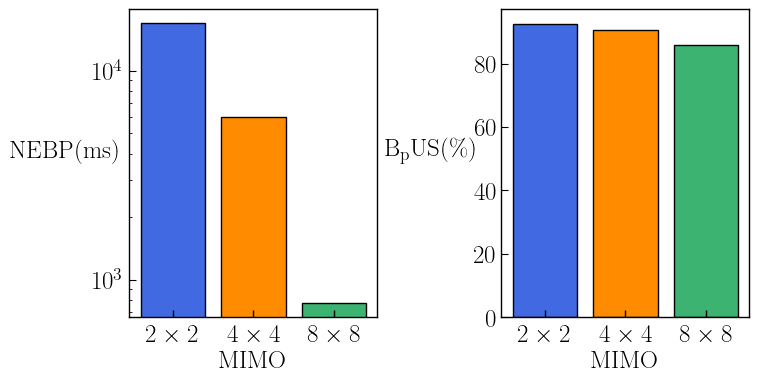

In [3]:
case = "seven"
gnbpower = ["40", "30", "20"]

mimos = ["2x2", "4x4", "8x8"]
uepower = ["8", "10", "15"]

markers = ["o", ".", "*"]
colors = ["royalblue", "darkorange", "mediumseagreen"]
total = 59950
update = [(1 - 4519 / total) * 100, (1 - 5650 / total) * 100, (1 - 8550 / total) * 100]

fig, axs = plt.subplots(
    nrows=1,
    ncols=2,
    sharey=False,
    sharex=True,
    gridspec_kw={"hspace": 0.3, "wspace": 0.5},
    figsize=(8, 4),
)

for mimo, gnbp, color, marker in zip(mimos, gnbpower, colors, markers):
    gain_time = []
    classic_time = []
    for power in uepower:
        file = (
            "./reported_results/classic_"
            + case
            + "_gnbtxpower_"
            + gnbp
            + "/mimo_"
            + mimo
            + "_uetxpower_"
            + power
            + "/final_result_time.pqt"
        )
        classic = pd.read_parquet(file)
        file1 = (
            "./reported_results/machine_"
            + case
            + "_gnbtxpower_"
            + gnbp
            + "/mimo_"
            + mimo
            + "_uetxpower_"
            + power
            + "/final_result_time.pqt"
        )
        machine = pd.read_parquet(file1)
        time_gain = pd.merge(
            machine,
            classic,
            how="inner",
            on=[
                machine.columns[machine.columns.str.contains("time")][0],
                classic.columns[classic.columns.str.contains("time")][0],
            ],
        )
        time_gain["gain"] = time_gain.iloc[:, 1] - time_gain.iloc[:, 2]
        gain_time.append(time_gain["gain"].mean())
        classic_time.append(
            classic[
                classic.columns[machine.columns.str.contains("updatetime")][0]
            ].mean()
        )
    if mimo == "2x2":
        axs[0].bar(
            r"$\mathrm{2\times 2}$", np.mean(gain_time), color=color, edgecolor="black"
        )
        print(
            "Average beam pair update time for ",
            mimo,
            " is ",
            int((np.mean(gain_time) / np.mean(classic_time)) * 100),
            "%",
        )
    elif mimo == "4x4":
        axs[0].bar(
            r"$\mathrm{4\times 4}$", np.mean(gain_time), color=color, edgecolor="black"
        )
        print(
            "Average beam pair update time for ",
            mimo,
            " is ",
            int((np.mean(gain_time) / np.mean(classic_time)) * 100),
            "%",
        )
    else:
        axs[0].bar(
            r"$\mathrm{8\times 8}$", np.mean(gain_time), color=color, edgecolor="black"
        )
        print(
            "Average beam pair update time for ",
            mimo,
            " is ",
            int((np.mean(gain_time) / np.mean(classic_time)) * 100),
            "%",
        )


axs[0].set_ylabel(r"$\mathrm{NEBP(ms)}$", rotation=0, labelpad=20)
axs[0].set_xlabel(r"$\mathrm{MIMO}$")
axs[0].set_yscale("log")

for mimo, value, color, marker in zip(mimos, update, colors, markers):
    if mimo == "2x2":
        axs[1].bar(r"$\mathrm{2\times 2}$", value, color=color, edgecolor="black")
    elif mimo == "4x4":
        axs[1].bar(r"$\mathrm{4\times 4}$", value, color=color, edgecolor="black")
    else:
        axs[1].bar(r"$\mathrm{8\times 8}$", value, color=color, edgecolor="black")

axs[1].set_ylabel(r"$\mathrm{B_pUS(\%)}$", rotation=0, labelpad=30)
axs[1].set_xlabel(r"$\mathrm{MIMO}$")

# Figure 10

In [ ]:
final_data=pd.read_parquet("reported_results/scenario_9_original_data.pqt")
gnb_data=pd.read_parquet("reported_results/scenario_9_gnb_pos.pqt")

final_data_2=pd.read_parquet("reported_results/scenario_23_original_data.pqt")
gnb_data_2=pd.read_parquet("reported_results/scenario_23_gnb_pos.pqt")

model = joblib.load("reported_results/scenario_9_model.pkl")
scaler = joblib.load("reported_results/scenario_9_scaler.pkl")

model_2 = joblib.load("reported_results/scenario_9_model.pkl")
scaler_2 = joblib.load("reported_results/scenario_9_scaler.pkl")

cmapscale = [
    "Greys",
    "Purples",
    "Blues",
    "Greens",
    "Oranges",
    "Reds",
    "YlOrBr",
    "YlOrRd",
    "OrRd",
    "PuRd",
    "RdPu",
    "BuPu",
    "GnBu",
    "PuBu",
    "YlGnBu",
    "PuBuGn",
    "BuGn",
    "YlGn",
]

levels = [0.25, 0.5, 0.75, 1]
h=0.02
beam_number=64
colors = cm.get_cmap('gist_rainbow', beam_number)
colormap = np.random.choice(cmapscale, beam_number)


fig, axs = plt.subplots(
    nrows=2,
    ncols=2,
    sharey=False,
    sharex=False,
    gridspec_kw={"hspace": 0.3, "wspace": 0.5},
    figsize=(8, 8),
)

im2=axs[0,0].scatter(final_data["x"], final_data["y"], c=final_data["beam"], cmap=colors, marker="o", s=20, linestyle="None")
axs[0,0].plot(gnb_data["x"], gnb_data["y"], marker='^', markersize=20, markerfacecolor="cyan", markeredgewidth=1, markeredgecolor="black")
axs[0,0].text(int(gnb_data["x"].values)+0.2, int(gnb_data["y"].values) + 0.5, r"$\mathrm{mmWaveRx}$", fontsize=18)
axs[0,0].set_xlabel(r"$x(\mathrm{m})$")
axs[0,0].set_ylabel(r"$y(\mathrm{m})$", rotation=0, labelpad=20)
axs[0,0].set_title(r"$\mathrm{DeepSense\,6G\,Scenario\,9}$")
cbar=fig.colorbar(im2)
cbar.set_label(r"$\mathrm{B_P}$", rotation=0, labelpad=20)

X=final_data[["x", "y"]].to_numpy()
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

M = scaler.transform(np.column_stack([xx.ravel(), yy.ravel()]))
Z = model.predict_proba(M)

for j in range(Z.shape[1]):
    p = Z[:, j]
    p = p.reshape(xx.shape)
    im = axs[0,1].contourf(xx, yy, p, levels, cmap=colormap[j], alpha=0.6)

axs[0,1].plot(gnb_data["x"], gnb_data["y"], marker='^', markersize=20, markerfacecolor="cyan", markeredgewidth=1, markeredgecolor="black")
axs[0,1].text(int(gnb_data["x"].values)+0.2, int(gnb_data["y"].values) + 0.5, r"$\mathrm{mmWaveRx}$", fontsize=18)
axs[0,1].plot(final_data["x"].mean(), final_data["y"].min()+1, marker='*', markersize=18, markerfacecolor="red", markeredgewidth=1, markeredgecolor="black")
axs[0,1].text(int(final_data["x"].mean()), int(final_data["y"].min()) + 1.5, r"$\mathrm{mmWaveTx}$", fontsize=18)
axs[0,1].text(final_data["x"].max()+3.5, final_data["y"].max(), r"$v=1.42m/s$", fontsize=18)
axs[0,1].text(final_data["x"].max()+3.5, final_data["y"].max()-1, r"$t_{\mathrm{update}}=1639ms$", fontsize=18)
axs[0,1].text(final_data["x"].max()+3.5, final_data["y"].max() - 2, r"$v=11.17m/s$", fontsize=18)
axs[0,1].text(final_data["x"].max()+3.5, final_data["y"].max() - 3, r"$t_{\mathrm{update}}=208ms$", fontsize=18)
axs[0,1].set_xlabel(r"$x(\mathrm{m})$")
axs[0,1].set_ylabel(r"$y(\mathrm{m})$", rotation=0, labelpad=20)
cbar = fig.colorbar(im)
cbar.set_label(r"$p(\mathrm{B_P}|x, y)$", rotation=0, labelpad=20)


im3=axs[1, 0].scatter(final_data_2["x"], final_data_2["y"], c=final_data_2["beam"], cmap=colors, marker="o", s=20, linestyle="None")
axs[1, 0].plot(gnb_data_2["x"], gnb_data_2["y"], marker='^', markersize=20, markerfacecolor="cyan", markeredgewidth=1, markeredgecolor="black")
axs[1, 0].text(int(gnb_data_2["x"].values)+0.2, int(gnb_data_2["y"].values) + 0.5, r"$\mathrm{mmWaveRx}$", fontsize=18)
axs[1, 0].set_xlabel(r"$x(\mathrm{m})$")
axs[1, 0].set_ylabel(r"$y(\mathrm{m})$", rotation=0, labelpad=20)
axs[1, 0].set_title(r"$\mathrm{DeepSense\,6G\,Scenario\,23}$")
cbar=fig.colorbar(im3)
cbar.set_label(r"$\mathrm{B_P}$", rotation=0, labelpad=20)

X=final_data_2[["x", "y"]].to_numpy()
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
M = scaler_2.transform(np.column_stack([xx.ravel(), yy.ravel()]))
Z = model_2.predict_proba(M)
for j in range(Z.shape[1]):
    p = Z[:, j]
    p = p.reshape(xx.shape)
    im = axs[1,1].contourf(xx, yy, p, levels, cmap=colormap[j], alpha=0.6)

axs[1,1].plot(gnb_data_2["x"], gnb_data_2["y"], marker='^', markersize=20, markerfacecolor="cyan", markeredgewidth=1, markeredgecolor="black")
axs[1,1].text(int(gnb_data_2["x"].values)+0.2, int(gnb_data_2["y"].values) + 0.5, r"$\mathrm{mmWaveRx}$", fontsize=18)
axs[1,1].plot(final_data_2["x"].max(), final_data_2["y"].max(), marker='*', markersize=18, markerfacecolor="red", markeredgewidth=1, markeredgecolor="black")
axs[1,1].text(int(final_data["x"].max()), int(final_data["y"].max()) + 1.5, r"$\mathrm{mmWaveTx}$", fontsize=18)
axs[1,1].text(final_data_2["x"].max()+3.5, final_data_2["y"].max(), r"$v=4.36m/s$", fontsize=18)
axs[1,1].text(final_data_2["x"].max()+3.5, final_data_2["y"].max()-1, r"$t_{\mathrm{update}}=3444ms$", fontsize=18)
axs[1,1].set_xlabel(r"$x(\mathrm{m})$")
axs[1,1].set_ylabel(r"$y(\mathrm{m})$", rotation=0, labelpad=20)
cbar = fig.colorbar(im)
cbar.set_label(r"$p(\mathrm{B_P}|x, y)$", rotation=0, labelpad=20)

# Beam pair update time for real scenarios

In [16]:
final_data=pd.read_parquet("reported_results/scenario_9_original_data.pqt")
velocity=11.176
times=[]
zones=pd.read_parquet("reported_results/scenario_9_decision.pqt")
for clase in range(int(len(zones.columns)/2)):
    x=zones["class"+ str(clase) +" x"].dropna().to_numpy()
    y=zones["class"+ str(clase) +" y"].dropna().to_numpy()
    time=np.sqrt((x-final_data["x"].mean())**2 + (y-final_data["y"].min())**2)/velocity
    mi=min(time)
    times.append(mi)

print("Beam pair update time for position x=", round(final_data["x"].mean(),3), " y=", round(final_data["y"].min(),3), " is ",  int(min(times)*1000), "ms")

Beam pair update time for position x= 413635.91  y= 3698149.854  is  208 ms


# Function for computing Beamforming Procedures using Ml-Aided Solution

In [2]:
case="seven"

mimos = ["8x8"]
uepower = ["8", "10", "15"]
gnbpower="20"

update_label = "SimInfo"
word="update"

for mimo in mimos:
    update_classic = []
    update_machine = []
    for power in uepower:
        input_folder = (
            "./reported_results/classic_"+case+"_gnbtxpower_" + gnbpower +"/mimo_" + mimo + "_uetxpower_" + power + "/"
        )
        for file in glob.glob(input_folder + "/*" + update_label + "*"):
            count = 0
            with open(file, "r") as f: 
                for line in f: 
                    words = line.split() 
                    for i in words: 
                        if(i==word): 
                            count=count+1
            update_classic.append(count)
    print("Quantity of Beamforming Procedures in Exaustive Search is ", int(np.mean(update_classic)))

    for power in uepower:
        input_folder = (
            "./reported_results/machine_"+case+"_gnbtxpower_" + gnbpower +"/mimo_" + mimo + "_uetxpower_" + power + "/"
        )
        for file in glob.glob(input_folder + "/*" + update_label + "*"):
            count = 0
            with open(file, "r") as f: 
                for line in f: 
                    words = line.split() 
                    for i in words: 
                        if(i==word): 
                            count=count+1
            update_machine.append(count)
    print("Quantity of Beamforming Procedures in ML-Aided is ", int(np.mean(update_machine)))

    print("Percentaje of reduction in Beamforming Procedures is", round((1-(np.mean(update_machine)/np.mean(update_classic)))*100, 2),"%")

Quantity of Beamforming Procedures in Exaustive Search is  1199
Quantity of Beamforming Procedures in ML-Aided is  171
Percentaje of reduction in Beamforming Procedures is 85.74 %


# Function for processing NS3 RxPacketTrace by experiment

In [18]:
case="seven"

mimos = ["8x8"]
uepower = ["8", "10", "15"]
gnbpower="20"

sinr_label = "RxPacketTrace"

for mimo in mimos:
    
    for power in uepower:
        classic_final_sinr = {}
        machine_final_sinr={}
        input_folder = (
            "./reported_results/classic_"+case+"_gnbtxpower_" + gnbpower +"/mimo_" + mimo + "_uetxpower_" + power + "/"
        )

        times = []
        sinrs = []
        for file in glob.glob(input_folder + "/*" + sinr_label + "*"):
            classic_data = pd.read_csv(file, delimiter="\t")
            times.append(
                classic_data.loc[classic_data["DL/UL"] == "DL"]["time"].values.tolist()
            )

        time_all_classic = sorted(list(set.intersection(*map(set, times))))
        classic_final_sinr[
            "mimo_" + mimo + "_uetxpower_" + power + "_time"
        ] = time_all_classic
        check = []
        for file in glob.glob(input_folder + "/*" + sinr_label + "*"):
            classic_data = pd.read_csv(file, delimiter="\t")
            sinrs.append(
                classic_data.loc[
                    (classic_data["DL/UL"] == "DL")
                    & (classic_data["time"].isin(time_all_classic))
                ]["SINR(dB)"]
                .sort_values()
                .to_numpy()
            )
            check.append(
                len(
                    classic_data.loc[
                        (classic_data["DL/UL"] == "DL")
                        & (classic_data["time"].isin(time_all_classic))
                    ]["SINR(dB)"]
                    .sort_values()
                    .to_numpy()
                )
            )
        if len(set(check)) != 1:
            sinrs[
                check.index(
                    list(Counter(check).keys())[
                        list(Counter(check).values()).index(
                            min(list(Counter(check).values()))
                        )
                    ]
                )
            ] = sinrs[
                check.index(
                    list(Counter(check).keys())[
                        list(Counter(check).values()).index(
                            min(list(Counter(check).values()))
                        )
                    ]
                )
            ][
                0 : list(Counter(check).keys())[
                    list(Counter(check).values()).index(
                        max(list(Counter(check).values()))
                    )
                ]
            ]

        classic_final_sinr["mimo_" + mimo + "_uetxpower_" + power + "_sinr"] = np.mean(
            sinrs, axis=0
        )
        classic_final_sinr = pd.DataFrame(classic_final_sinr)
        classic_final_sinr.to_parquet(input_folder + "final_result_sinr.pqt")

        input_folder="./reported_results/machine_"+case+"_gnbtxpower_" + gnbpower +"/mimo_" + mimo +"_uetxpower_"+ power + "/"

        times=[]
        sinrs=[]
        for file in glob.glob(input_folder + "/*"+ sinr_label +"*"):
            machine_data=pd.read_csv(file, delimiter="\t")
            times.append(machine_data.loc[machine_data["DL/UL"] == "DL"]["time"].values.tolist())

        time_all_machine=sorted(list(set.intersection(*map(set,times))))
        machine_final_sinr[
            "mimo_" + mimo + "_uetxpower_" + power + "_time"
        ] = time_all_machine
        check = []
        for file in glob.glob(input_folder + "/*"+ sinr_label +"*"):
            machine_data=pd.read_csv(file, delimiter="\t")
            sinrs.append(machine_data.loc[(machine_data["DL/UL"] == "DL") & (machine_data["time"].isin(time_all_machine))]["SINR(dB)"].sort_values().to_numpy())
            check.append(
                len(
                    machine_data.loc[
                        (machine_data["DL/UL"] == "DL")
                        & (machine_data["time"].isin(time_all_machine))
                    ]["SINR(dB)"]
                    .sort_values()
                    .to_numpy()
                )
            )
        if len(set(check)) != 1:
            sinrs[
                check.index(
                    list(Counter(check).keys())[
                        list(Counter(check).values()).index(
                            min(list(Counter(check).values()))
                        )
                    ]
                )
            ] = sinrs[
                check.index(
                    list(Counter(check).keys())[
                        list(Counter(check).values()).index(
                            min(list(Counter(check).values()))
                        )
                    ]
                )
            ][
                0 : list(Counter(check).keys())[
                    list(Counter(check).values()).index(
                        max(list(Counter(check).values()))
                    )
                ]
            ]
        machine_final_sinr[
            "mimo_" + mimo + "_uetxpower_" + power + "_sinr"
        ] = np.mean(sinrs, axis=0)
        machine_final_sinr = pd.DataFrame(machine_final_sinr)
        machine_final_sinr.to_parquet(input_folder + "final_result_sinr.pqt")

# Function for processing NS3 DlPdcpStats by experiment

In [19]:
case="seven"

mimos = ["8x8"]
uepower = ["8", "10", "15"]
gnbpower="20"

thrp_label = "DlPdcpStats"
scale = 8 / 1e6


for mimo in mimos:
    for power in uepower:
        classic_final_thrp = {}
        machine_final_thrp = {}
        input_folder = (
            "./reported_results/classic_"+case+"_gnbtxpower_" + gnbpower +"/mimo_" + mimo + "_uetxpower_" + power + "/"
        )

        times = []
        thrp = []
        for file in glob.glob(input_folder + "/*" + thrp_label + "*"):
            classic_data = pd.read_csv(file, delimiter="\t")
            classic_data = classic_data.drop(labels=[0,1])
            times.append(classic_data["start"].to_numpy())

        time_all_classic = sorted(list(set.intersection(*map(set, times))))
        classic_final_thrp["mimo_" + mimo + "_uetxpower_" + power + "_time"]=time_all_classic
        for file in glob.glob(input_folder + "/*" + thrp_label + "*"):
            classic_data = pd.read_csv(file, delimiter="\t")
            classic_data = classic_data.drop(labels=[0,1])
            thrp.append(
                scale
                * classic_data[classic_data["start"].isin(time_all_classic)
                ]["RxBytes"].to_numpy()
            )
        classic_final_thrp["mimo_" + mimo + "_uetxpower_" + power + "_thrp"]=np.mean(thrp, axis=0)
        classic_final_thrp = pd.DataFrame(classic_final_thrp)
        classic_final_thrp.to_parquet(input_folder + "final_result_thrp.pqt")

        input_folder = (
            "./reported_results/machine_"+case+"_gnbtxpower_" + gnbpower +"/mimo_" + mimo + "_uetxpower_" + power + "/"
        )

        times = []
        thrp = []
        for file in glob.glob(input_folder + "/*" + thrp_label + "*"):
            machine_data = pd.read_csv(file, delimiter="\t")
            machine_data = machine_data.drop(labels=[0,1])
            times.append(machine_data["start"].to_numpy())

        time_all_machine = sorted(list(set.intersection(*map(set, times))))
        machine_final_thrp["mimo_" + mimo + "_uetxpower_" + power + "_time"]=time_all_machine
        for file in glob.glob(input_folder + "/*" + thrp_label + "*"):
            machine_data = pd.read_csv(file, delimiter="\t")
            machine_data = machine_data.drop(labels=[0,1])
            thrp.append(
                scale
                * machine_data[
                machine_data["start"].isin(time_all_machine)
                ]["RxBytes"].to_numpy()
            )
        machine_final_thrp["mimo_" + mimo + "_uetxpower_" + power + "_thrp"]=np.mean(thrp, axis=0)
        machine_final_thrp = pd.DataFrame(machine_final_thrp)
        machine_final_thrp.to_parquet(input_folder + "final_result_thrp.pqt")

# Function for processing NS3 BeamTraceFile by experiment

In [20]:
case="seven"

mimos = ["8x8"]
uepower = ["8", "10", "15"]
gnbpower="20"

beam_label = "BeamTraceFile"

for mimo in mimos:
    if mimo == "2x2":
        gnbcodewords = 3
        uecodewords = 2
    elif mimo == "4x4":
        gnbcodewords = 21
        uecodewords = 2
    else:
        gnbcodewords = 70
        uecodewords = 2

    pairmatrix = np.arange(0, gnbcodewords * uecodewords)
    pairmatrix = pairmatrix.reshape(uecodewords, gnbcodewords)

    for power in uepower:
        classic_final_beam = {}
        classic_final_time = {}
        machine_final_beam = {}
        machine_final_time = {}
        input_folder = (
            "./reported_results/classic_"+case+"_gnbtxpower_" + gnbpower +"/mimo_" + mimo + "_uetxpower_" + power + "/"
        )

        times = []
        beam = []
        uptime=[]
        for file in glob.glob(input_folder + "/*" + beam_label + "*"):
            classic_data = pd.read_csv(file, delimiter="\t")
            classic_data = classic_data.drop_duplicates(subset=["time"], keep=False)
            times.append(classic_data["time"].values.tolist())
            
        time_all_classic = sorted(list(set.intersection(*map(set, times))))
        classic_final_beam["mimo_" + mimo + "_uetxpower_" + power + "_time"]=time_all_classic

        for file in glob.glob(input_folder + "/*" + beam_label + "*"):
            classic_data = pd.read_csv(file, delimiter="\t")
            classic_data = classic_data.drop_duplicates(subset=["time"], keep=False)
            beam.append(
                pairmatrix[
                    classic_data.loc[classic_data["time"].isin(time_all_classic)][
                        "uebeam"
                    ]
                    .to_numpy()
                    .astype(int),
                    classic_data.loc[classic_data["time"].isin(time_all_classic)][
                        "gnbbeam"
                    ]
                    .to_numpy()
                    .astype(int),
                ]
            )
            uptime.append(classic_data.loc[classic_data["time"].isin(time_all_classic)]["updatetime"].to_numpy())
        aux=pd.DataFrame(beam)
        classic_final_beam["mimo_" + mimo + "_uetxpower_" + power + "_beam"] = aux.mode().values.tolist()[0]
        classic_final_beam = pd.DataFrame(classic_final_beam)
        classic_final_beam.to_parquet(input_folder + "final_result_beam.pqt")

        classic_final_time["mimo_" + mimo + "_uetxpower_" + power + "_time"]=time_all_classic
        classic_final_time["mimo_" + mimo + "_uetxpower_" + power + "_updatetime"]=np.mean(uptime, axis=0)
        classic_final_time = pd.DataFrame(classic_final_time)
        classic_final_time.to_parquet(input_folder + "final_result_time.pqt")

        input_folder = (
            "./reported_results/machine_"+case+"_gnbtxpower_" + gnbpower +"/mimo_" + mimo + "_uetxpower_" + power + "/"
        )
        times = []
        beam = []
        uptime=[]
        for file in glob.glob(input_folder + "/*" + beam_label + "*"):
            machine_data = pd.read_csv(file, delimiter="\t")
            machine_data = machine_data.drop_duplicates(subset=["time"], keep=False)
            times.append(machine_data["time"].values.tolist())

        time_all_machine = sorted(list(set.intersection(*map(set, times))))
        machine_final_beam["mimo_" + mimo + "_uetxpower_" + power + "_time"]=time_all_machine

        for file in glob.glob(input_folder + "/*" + beam_label + "*"):
            machine_data = pd.read_csv(file, delimiter="\t")
            machine_data = machine_data.drop_duplicates(subset=["time"])
            beam.append(
                pairmatrix[
                    machine_data.loc[machine_data["time"].isin(time_all_machine)][
                        "uebeam"
                    ]
                    .to_numpy()
                    .astype(int),
                    machine_data.loc[machine_data["time"].isin(time_all_machine)][
                        "gnbbeam"
                    ]
                    .to_numpy()
                    .astype(int),
                ]
            )
            uptime.append(machine_data.loc[machine_data["time"].isin(time_all_machine)]["updatetime"].to_numpy())
        aux=pd.DataFrame(beam)
        machine_final_beam["mimo_" + mimo + "_uetxpower_" + power + "_beam"] = aux.mode().values.tolist()[0]
        machine_final_beam = pd.DataFrame(machine_final_beam)
        machine_final_beam.to_parquet(input_folder + "final_result_beam.pqt")

        machine_final_time["mimo_" + mimo + "_uetxpower_" + power + "_time"]=time_all_machine
        machine_final_time["mimo_" + mimo + "_uetxpower_" + power + "_updatetime"]=np.mean(uptime, axis=0)
        machine_final_time = pd.DataFrame(machine_final_time)
        machine_final_time.to_parquet(input_folder + "final_result_time.pqt")